In [1]:
from elecmarket import *
import os as os
import matplotlib.pyplot as plt 
from matplotlib import cm
import seaborn as sns

np.random.seed(42)

In [2]:
scenario_name = "no_policy"

cp = getpar("common_params.py")

cagents = [Conventional('Coal', cp, getpar('coal.py')),
          Conventional('Gas', cp, getpar('gas.py'))]

ragents = [Renewable('Wind', cp, getpar('renewable.py'))]

Niter = cp['iterations']
tol = cp['tolerance']

sim = Simulation(cagents,ragents,cp)

start_simu = time.time()

Carbon Tax:  0.0
Subsidy:  0.0


In [3]:
###################### Version MFG ######################

conv, elapsed, Nit = sim.run(Niter, tol, cp['power'], cp['offset'])

print('Elapsed time: ', elapsed/60, ' min')


Iteration 0
Weight: 0.2759; Wind: 1981724.18; Coal: 2446734.98; Gas: 3874748.75; Total: 8303207.91
Iteration 1
Weight: 0.2385; Wind: 272990.94; Coal: 243969.57; Gas: 546140.54; Total: 1063101.05
Iteration 2
Weight: 0.2108; Wind: 87624.12; Coal: 9391.53; Gas: 52985.16; Total: 150000.81
Iteration 3
Weight: 0.1895; Wind: 68944.94; Coal: 6687.26; Gas: 16466.14; Total: 92098.34
Iteration 4
Weight: 0.1724; Wind: 56149.94; Coal: 4307.63; Gas: 10137.29; Total: 70594.87
Iteration 5
Weight: 0.1585; Wind: 46440.93; Coal: 3478.41; Gas: 7494.48; Total: 57413.82
Iteration 6
Weight: 0.1469; Wind: 39157.33; Coal: 3141.80; Gas: 5900.82; Total: 48199.96
Iteration 7
Weight: 0.1370; Wind: 33307.28; Coal: 2650.16; Gas: 5014.33; Total: 40971.78
Iteration 8
Weight: 0.1285; Wind: 28767.72; Coal: 2367.65; Gas: 4257.82; Total: 35393.20
Iteration 9
Weight: 0.1211; Wind: 25017.09; Coal: 1959.18; Gas: 3715.11; Total: 30691.37
Iteration 10
Weight: 0.1146; Wind: 22000.62; Coal: 1715.48; Gas: 3233.58; Total: 26949.68

In [4]:
out = sim.write(scenario_name)

try:
    os.mkdir(scenario_name)
except FileExistsError:
    print('Directory already exists')
    
os.system(f"copy common_params.py {scenario_name}\\common_params.py")

# parameter files are copied to output directory; change this if you change agent types
os.system(f"copy common_params.py {scenario_name}\\coal.py")
os.system(f"copy common_params.py {scenario_name}\\gas.py")
os.system(f"copy common_params.py {scenario_name}\\renewable.py")

os.system(f"copy common_params.py {scenario_name}\\"+scenario_name+".csv")


Directory already exists


0

In [5]:
# Years for tick marks
years = list(range(2019, 2019 + cp['tmax']))  # Years from 2024 to 2040

# Creating a DataFrame for easy plotting with seaborn
df = pd.DataFrame({
    'Year': out['time'],
    'Peak Price': out['peak price'],
    'Offpeak Price': out['offpeak price'],
    'Coal Capacity': out['Coal capacity'], #Conv GW
    'Gas Capacity': out['Gas capacity'], #Conv GW
    'Wind Capacity': out['Wind capacity'], #Conv GW
    'Coal Price': out['Fuel 0'],
    'Gas Price': out['Fuel 1'],
    'Peak Demand': sim.pdemand, #Conv GW
    'Offpeak Demand': sim.opdemand, #Conv GW
    'Coal Offpeak Supply': out['Coal offpeak supply'], #Conv GWh
    'Gas Offpeak Supply': out['Gas offpeak supply'], #Conv GW
    'Wind Offpeak Supply': out['Wind offpeak supply'], #Conv GW
    'Coal Peak Supply': out['Coal peak supply'], #Conv GW
    'Gas Peak Supply': out['Gas peak supply'], #Conv GW
    'Wind Peak Supply': out['Wind peak supply'], #Conv GW
    'Baseload Peak Supply': out['Baseload peak supply'],
    'Baseload Offpeak Supply': out['Baseload offpeak supply'],
    'Default Peak': out['Default peak'],
    'Default Offpeak': out['Default offpeak'],
    'Coal Market Gain (min)': out['Coal Market gains (min)'],
    'Coal Market Gain (max)': out['Coal Market gains (max)'],
    'Coal Market Gain (average)': out['Coal Market gains (average)'],
    'Gas Market Gain (min)': out['Gas Market gains (min)'],
    'Gas Market Gain (max)': out['Gas Market gains (max)'],
    'Gas Market Gain (average)': out['Gas Market gains (average)'],
    'Wind Market Gain (min)': out['Wind Market gains (min)'],
    'Wind Market Gain (max)': out['Wind Market gains (max)'],
    'Wind Market Gain (average)': out['Wind Market gains (average)'],
    'Carbon emissions Offpeak': out['Carbon offpeak'],
    'Carbon emissions Peak': out['Carbon peak'],
    'Coal Market Offpeak revenues': out['Coal Market revenues offpeak'],
    'Coal Market Peak revenues': out['Coal Market revenues peak'],
    'Gas Market Offpeak revenues': out['Gas Market revenues offpeak'],
    'Gas Market Peak revenues': out['Gas Market revenues peak'],
    'Wind Market Offpeak revenues': out['Wind Market revenues offpeak'],
    'Wind Market Peak revenues': out['Wind Market revenues peak'],
})

df['Year'] = df['Year'].map(lambda x: 2019 + x)
tick_indices = range(2019, 2019+cp['tmax'], 2)

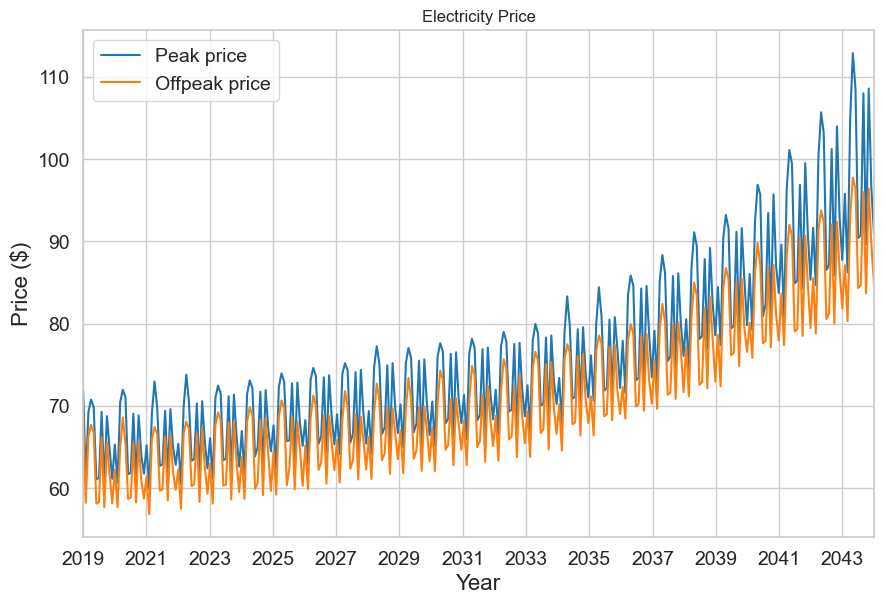

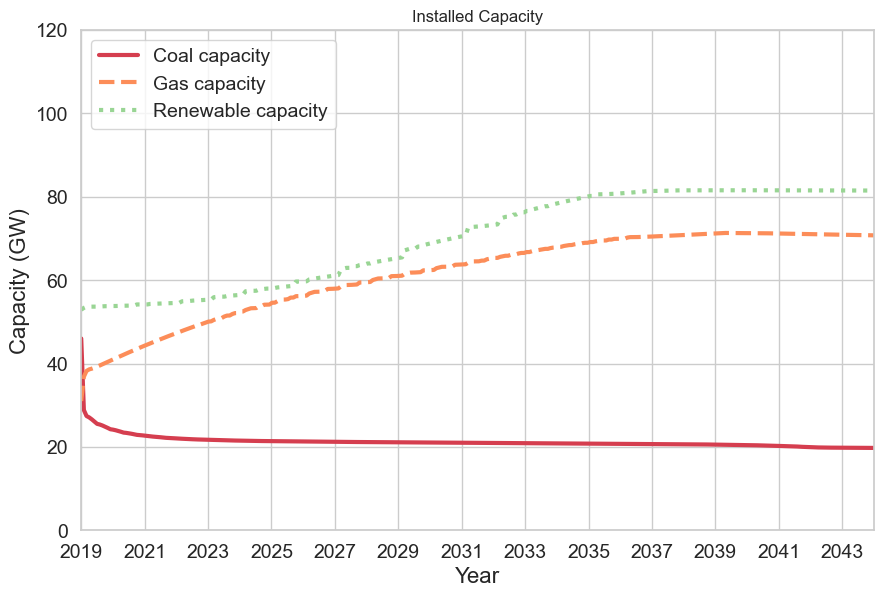

In [15]:
# First plot: Electricity Prices
fig, ax1 = plt.subplots(figsize=(9, 6))

# Plotting the electricity prices with seaborn
sns.lineplot(ax=ax1, x='Year', y='Peak Price', data=df, label='Peak price', color='tab:blue')
sns.lineplot(ax=ax1, x='Year', y='Offpeak Price', data=df, label='Offpeak price', color='tab:orange')

ax1.set_ylabel('Price ($)', fontsize=16)
ax1.set_xlabel('Year', fontsize=16)
ax1.set_xlim(2019, 2019+cp['tmax'])
ax1.legend(loc='upper left', fontsize=14)

# Set x-axis ticks to display every other year for less clutter
ax1.set_xticks(tick_indices)
ax1.tick_params(axis='both', which='major', labelsize=14)

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the figure to a PDF file
plt.savefig(scenario_name + "/" + 'price.pdf', format='pdf')
ax1.set_title('Electricity Price')
plt.show()

# Second plot: Installed Capacity
fig, ax2 = plt.subplots(figsize=(9,6))

# Plotting the capacity for each agent type with seaborn
sns.lineplot(ax=ax2, x='Year', y='Coal Capacity', data=df, label='Coal capacity', linewidth=3, color='#d53e4f')
sns.lineplot(ax=ax2, x='Year', y='Gas Capacity', data=df, label='Gas capacity', linewidth=3, linestyle="dashed", color='#fc8d59')
sns.lineplot(ax=ax2, x='Year', y='Wind Capacity', data=df, linestyle='dotted', label='Renewable capacity', linewidth=3, color='#99d594')

ax2.set_ylabel('Capacity (GW)', fontsize=16)
ax2.set_xlabel('Year', fontsize=16)
ax2.set_ylim(0, 120)
ax2.set_xlim(2019, 2019+cp['tmax'])
ax2.legend(loc='upper left', fontsize=14)


# Apply the same x-axis settings to the second subplot
ax2.set_xticks(tick_indices)
ax2.tick_params(axis='both', which='major', labelsize=14)

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the figure to a PDF file
plt.savefig(scenario_name + "/" + 'capacity.pdf', format='pdf')
ax2.set_title('Installed Capacity')
plt.show()


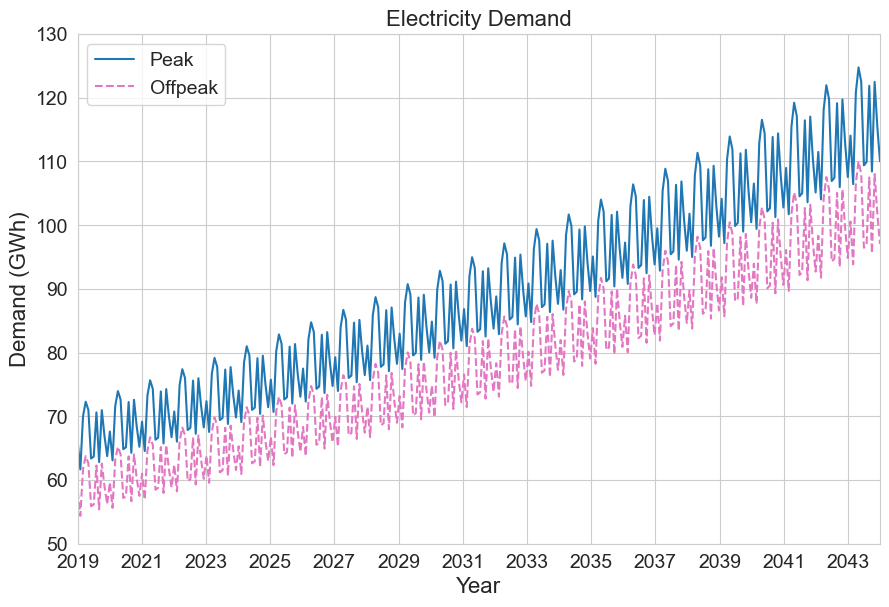

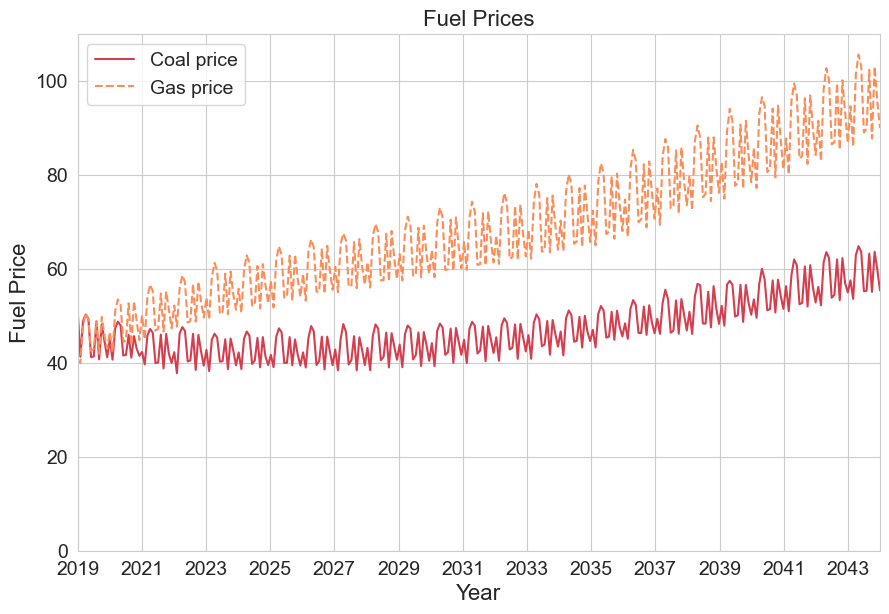

In [7]:
# First plot: Electricity Demand
fig, ax1 = plt.subplots(figsize=(9, 6))

# Plotting demand
sns.lineplot(ax=ax1, x='Year', y='Peak Demand', label='Peak', data=df, color='tab:blue')
sns.lineplot(ax=ax1, x='Year', y='Offpeak Demand', label='Offpeak', data=df, color='tab:pink', linestyle='dashed')

ax1.legend(loc='upper left', fontsize=14)
ax1.set_xlabel('Year', fontsize=16)
ax1.set_ylabel('Demand (GWh)', fontsize=16)
ax1.set_xticks(tick_indices)
ax1.tick_params(axis='both', which='major', labelsize=14)
ax1.set_ylim(50, 130)
ax1.set_xlim(2019, 2019+cp['tmax'])
# Adjust layout to prevent overlap
plt.tight_layout()

# Save the figure to a PDF file
plt.savefig(scenario_name + "/demand.pdf", format='pdf')
ax1.set_title('Electricity Demand', fontsize=16)
plt.show()


# Second plot: Fuel Prices
fig, ax2 = plt.subplots(figsize=(9, 6))

# Plotting fuel prices
sns.lineplot(ax=ax2, x='Year', y='Coal Price', label='Coal price', data=df, color='#d53e4f')
sns.lineplot(ax=ax2, x='Year', y='Gas Price', label='Gas price', data=df, color='#fc8d59', linestyle='dashed')

ax2.legend(loc='upper left', fontsize=14)
ax2.set_xlabel('Year', fontsize=16)
ax2.set_ylabel('Fuel Price', fontsize=16)
ax2.set_xticks(tick_indices)
ax2.tick_params(axis='both', which='major', labelsize=14)
ax2.set_ylim(0, 110)
ax2.set_xlim(2019, 2019+cp['tmax'])

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the figure to a PDF file
plt.savefig(scenario_name + "/fuelprice.pdf", format='pdf')
ax2.set_title('Fuel Prices', fontsize=16)
plt.show()


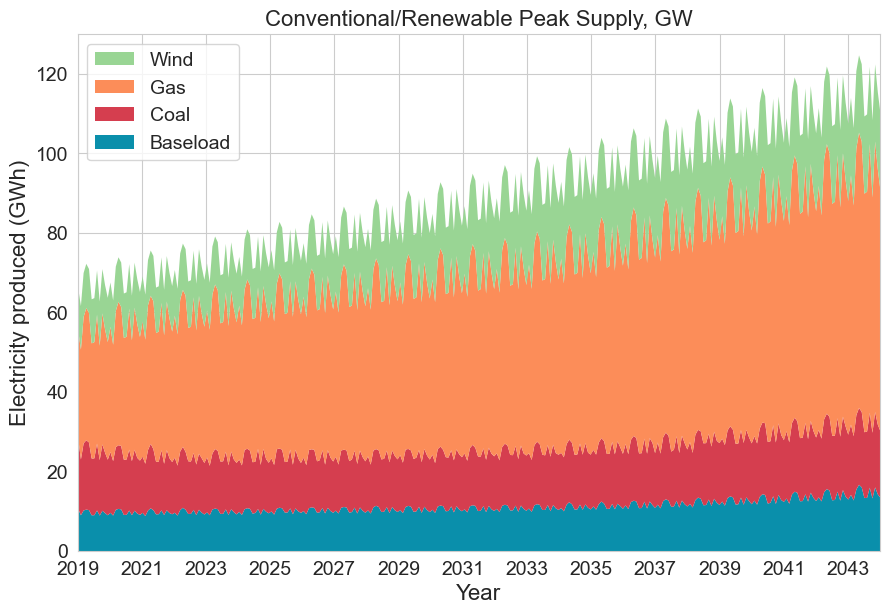

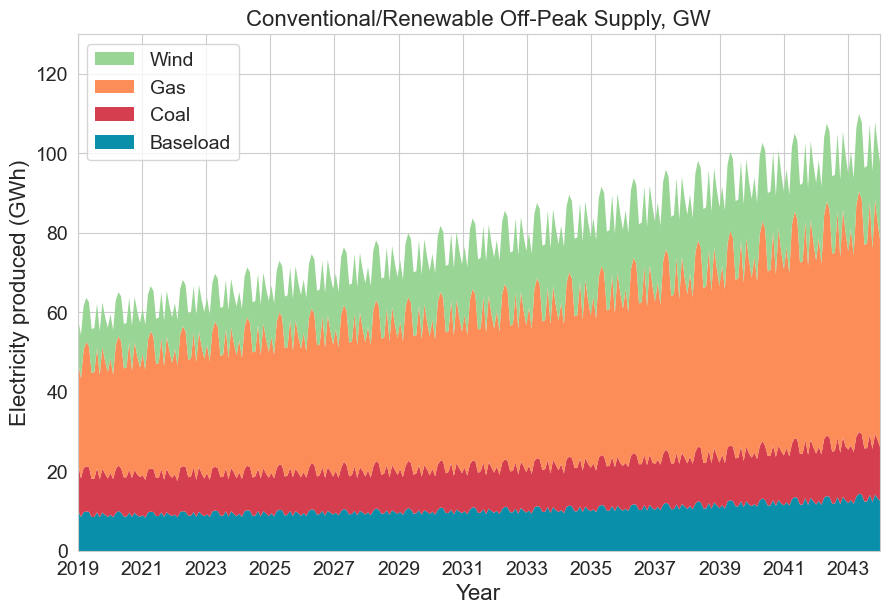

In [8]:
# First plot: Conventional/Renewable Peak Supply
fig, ax1 = plt.subplots(figsize=(9, 6))

# Plotting peak supply with stackplot
ax1.stackplot(df['Year'], df['Baseload Peak Supply'], df['Coal Peak Supply'], df['Gas Peak Supply'], df['Wind Peak Supply'], df['Default Peak'],
              labels=['Baseload', 'Coal', 'Gas', 'Wind'],
              colors=['#0a8fab','#d53e4f', '#fc8d59', '#99d594'], linewidth=0)

ax1.set_xlim(2019, 2019 + cp['tmax'])
ax1.set_ylim(0, 130)
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(reversed(handles), reversed(labels), loc='upper left', fontsize=14)
ax1.set_xlabel('Year', fontsize=16)
ax1.set_ylabel('Electricity produced (GWh)', fontsize=16)
ax1.set_xticks(tick_indices)
ax1.tick_params(axis='both', which='major', labelsize=14)

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the figure to a PDF file
plt.savefig(scenario_name + "/peak_supply.pdf", format='pdf')

ax1.set_title('Conventional/Renewable Peak Supply, GW', fontsize=16)
plt.show()

# Second plot: Conventional/Renewable Off-Peak Supply
fig, ax2 = plt.subplots(figsize=(9, 6))

# Plotting off-peak supply with stackplot
ax2.stackplot(df['Year'], df['Baseload Offpeak Supply'], df['Coal Offpeak Supply'], df['Gas Offpeak Supply'], df['Wind Offpeak Supply'],
              labels=['Baseload', 'Coal', 'Gas', 'Wind'],
              colors=['#0a8fab','#d53e4f', '#fc8d59', '#99d594'], linewidth=0)

ax2.set_xlim(2019, 2019 + cp['tmax'])
ax2.set_ylim(0, 130)
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(reversed(handles), reversed(labels), loc='upper left', fontsize=14)
ax2.set_xlabel('Year', fontsize=16)
ax2.set_ylabel('Electricity produced (GWh)', fontsize=16)
ax2.set_xticks(tick_indices)
ax2.tick_params(axis='both', which='major', labelsize=14)

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the figure to a PDF file
plt.savefig(scenario_name + "/offpeak_supply.pdf", format='pdf')

ax2.set_title('Conventional/Renewable Off-Peak Supply, GW', fontsize=16)
plt.show()


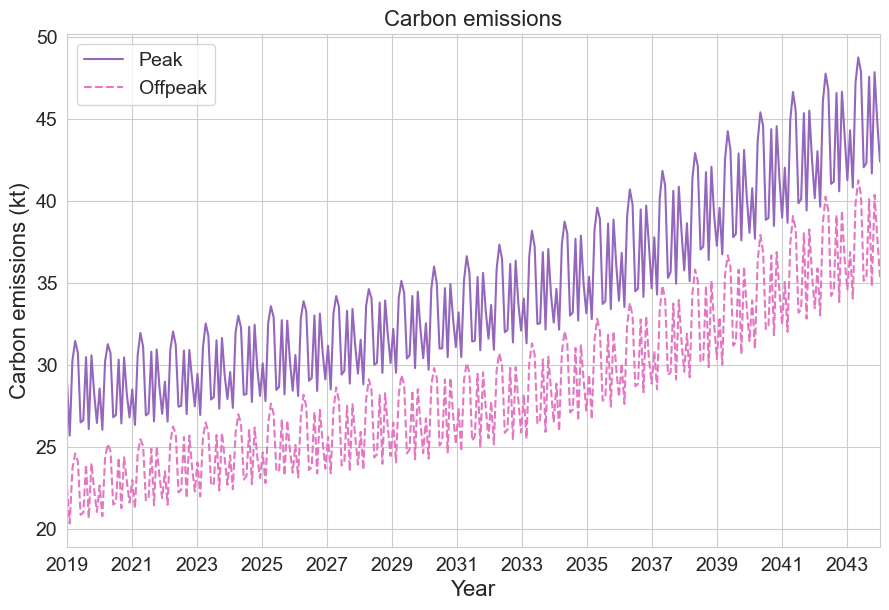

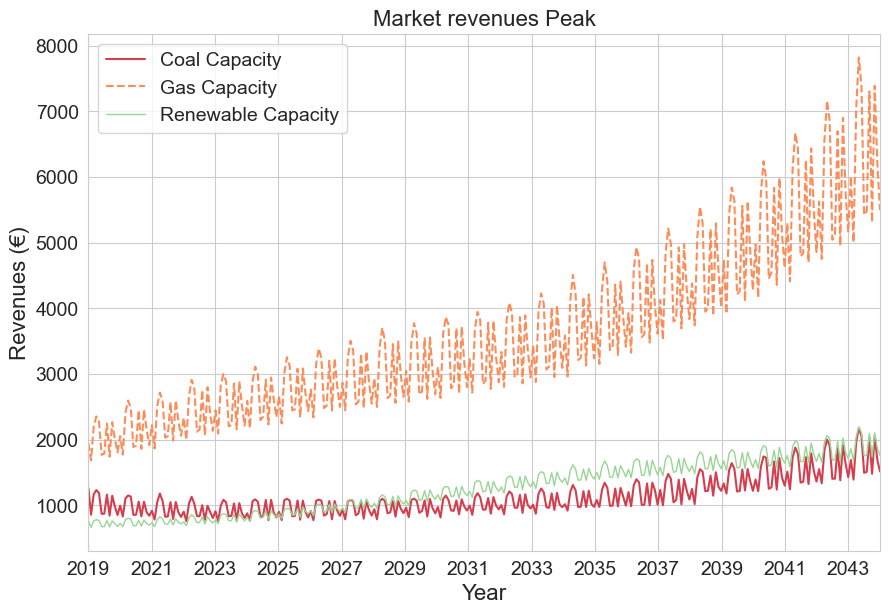

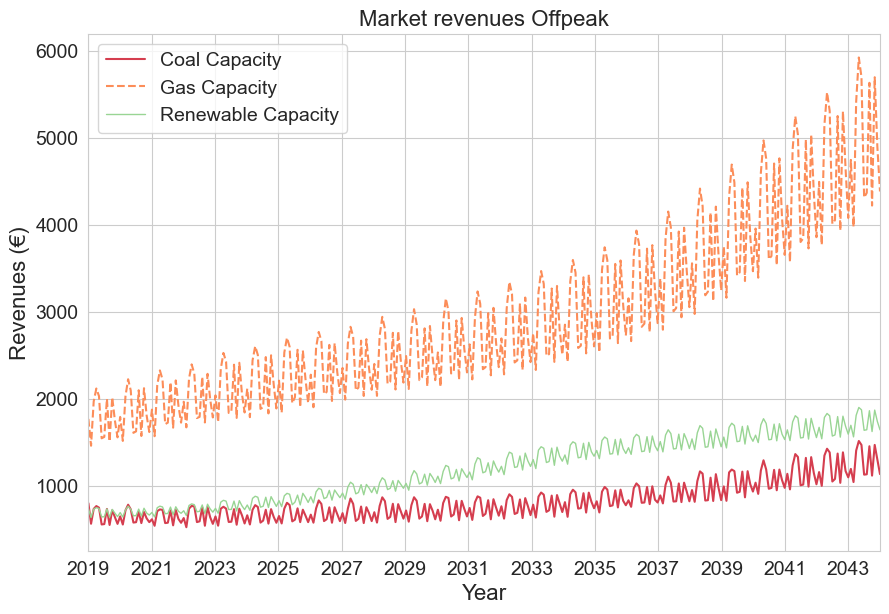

In [9]:
# First plot: Carbon Emissions
fig, ax1 = plt.subplots(figsize=(9, 6))

# Plotting the carbon emissions with seaborn
sns.lineplot(ax=ax1, x='Year', y='Carbon emissions Peak', data=df, label='Peak', color='tab:purple')
sns.lineplot(ax=ax1, x='Year', y='Carbon emissions Offpeak', data=df, label='Offpeak', linestyle="dashed", color='tab:pink')

ax1.set_ylabel('Carbon emissions (kt)', fontsize=16)
ax1.set_xlabel('Year', fontsize=16)
ax1.set_xlim(2019, 2019 + cp['tmax'])
ax1.legend(loc='upper left', fontsize=14)

# Set x-axis ticks to display every other year for less clutter
tick_indices = range(2019, 2019 + cp['tmax'], 2)  # This skips every other year
ax1.set_xticks(tick_indices)
ax1.tick_params(axis='both', which='major', labelsize=14)

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the figure to a PDF file
plt.savefig(scenario_name + "/carbon_emissions.pdf", format='pdf')

ax1.set_title('Carbon emissions', fontsize=16)
plt.show()

# Second plot: Market Revenues Peak
fig, ax2 = plt.subplots(figsize=(9, 6))

# Plotting the market revenues with seaborn
sns.lineplot(ax=ax2, x='Year', y='Coal Market Peak revenues', data=df, label='Coal Capacity', color='#d53e4f')
sns.lineplot(ax=ax2, x='Year', y='Gas Market Peak revenues', data=df, label='Gas Capacity', linestyle="dashed", color='#fc8d59')
sns.lineplot(ax=ax2, x='Year', y='Wind Market Peak revenues', data=df, label='Renewable Capacity', color='#99d594', linewidth=1)

ax2.set_ylabel('Revenues (€)', fontsize=16)
ax2.set_xlabel('Year', fontsize=16)
ax2.set_xlim(2019, 2019 + cp['tmax'])
ax2.legend(loc='upper left', fontsize=14)

# Apply the same x-axis settings to the second subplot
ax2.set_xticks(tick_indices)
ax2.tick_params(axis='both', which='major', labelsize=14)

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the figure to a PDF file
plt.savefig(scenario_name + "/market_revenues_peak.pdf", format='pdf')

ax2.set_title('Market revenues Peak', fontsize=16)
plt.show()

# Third plot: Market Revenues Offpeak
fig, ax3 = plt.subplots(figsize=(9, 6))

# Plotting the market revenues with seaborn
sns.lineplot(ax=ax3, x='Year', y='Coal Market Offpeak revenues', data=df, label='Coal Capacity', color='#d53e4f')
sns.lineplot(ax=ax3, x='Year', y='Gas Market Offpeak revenues', data=df, label='Gas Capacity', linestyle="dashed", color='#fc8d59')
sns.lineplot(ax=ax3, x='Year', y='Wind Market Offpeak revenues', data=df, label='Renewable Capacity', color='#99d594', linewidth=1)

ax3.set_ylabel('Revenues (€)', fontsize=16)
ax3.set_xlabel('Year', fontsize=16)
ax3.set_xlim(2019, 2019 + cp['tmax'])
ax3.legend(loc='upper left', fontsize=14)

# Apply the same x-axis settings to the second subplot
ax3.set_xticks(tick_indices)
ax3.tick_params(axis='both', which='major', labelsize=14)

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the figure to a PDF file
plt.savefig(scenario_name + "/market_revenues_offpeak.pdf", format='pdf')
ax3.set_title('Market revenues Offpeak', fontsize=16)
plt.show()


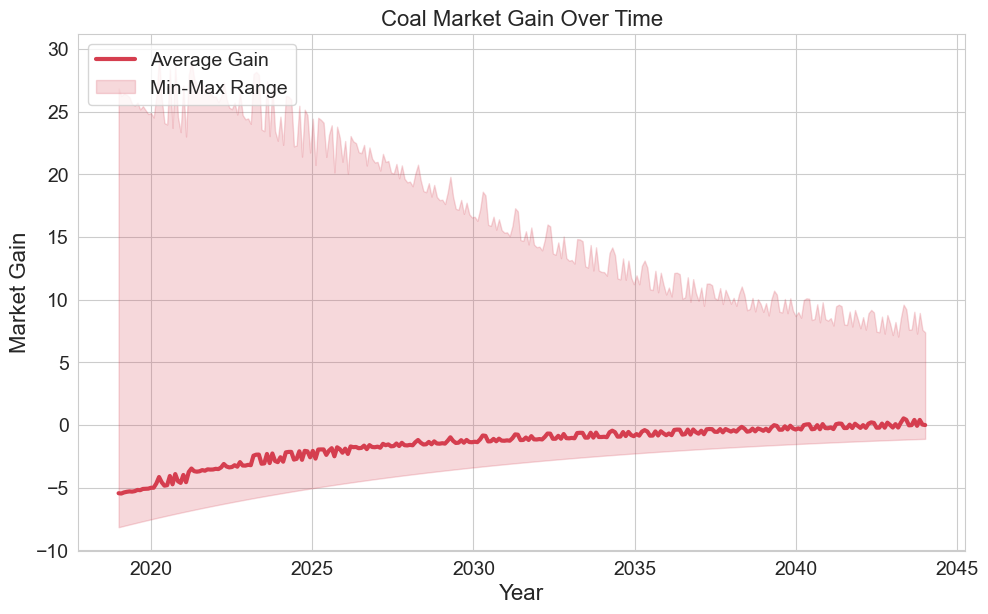

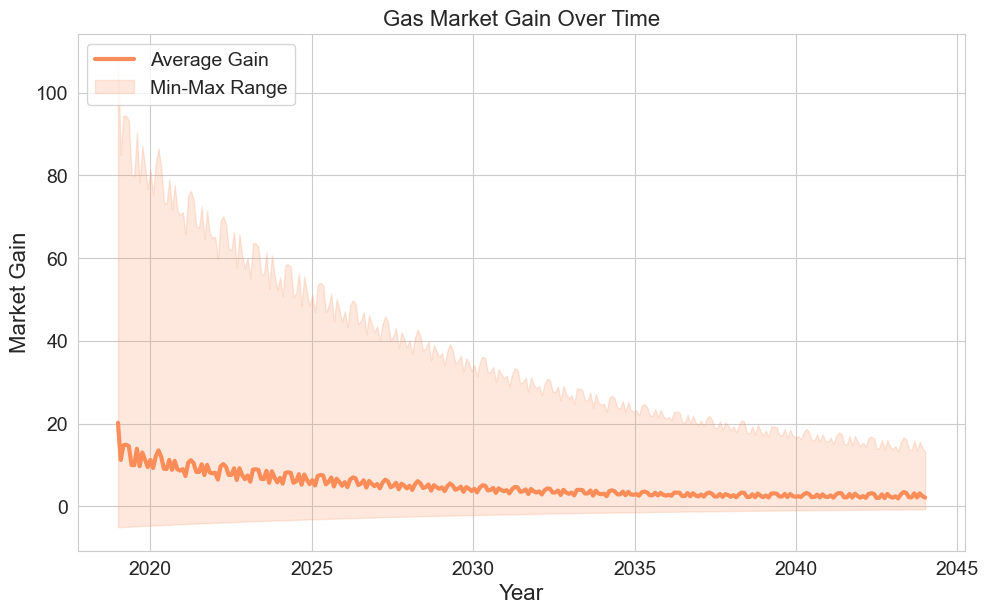

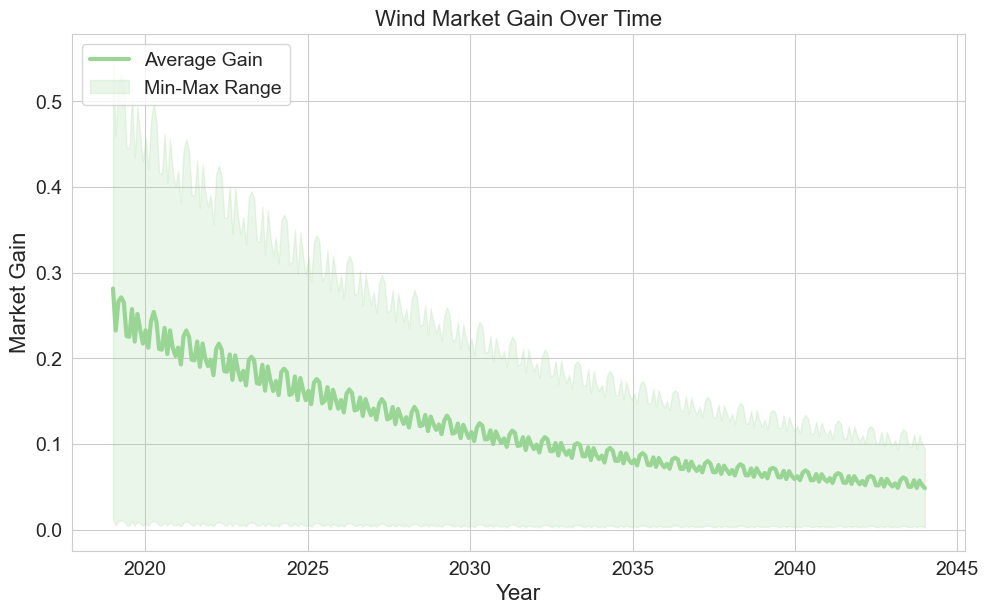

In [10]:
technology_colors = {
    'Coal': '#d53e4f',
    'Gas': '#fc8d59',
    'Wind': '#99d594'
}

def plot_gains(df, technology):
    plt.figure(figsize=(10, 6))
    color = technology_colors[technology]
    plt.plot(df['Year'], df[f'{technology} Market Gain (average)'], label='Average Gain', color=color, linewidth=3)
    plt.fill_between(df['Year'], df[f'{technology} Market Gain (min)'], df[f'{technology} Market Gain (max)'], color=color, alpha=0.2, label='Min-Max Range')
    plt.xlabel('Year', fontsize=16)
    plt.ylabel('Market Gain', fontsize=16)
    plt.legend(loc='upper left', fontsize=14)
    plt.grid(True)
    plt.tick_params(axis='both', which='major', labelsize=14)
    plt.tight_layout()
    plt.savefig(scenario_name + "/" + f"{technology.lower()}_market_gain.pdf", format='pdf')
    plt.title(f'{technology} Market Gain Over Time', fontsize=16)
    plt.show()

# Plotting gains for each technology
technologies = ['Coal', 'Gas', 'Wind']
for tech in technologies:
    plot_gains(df, tech)

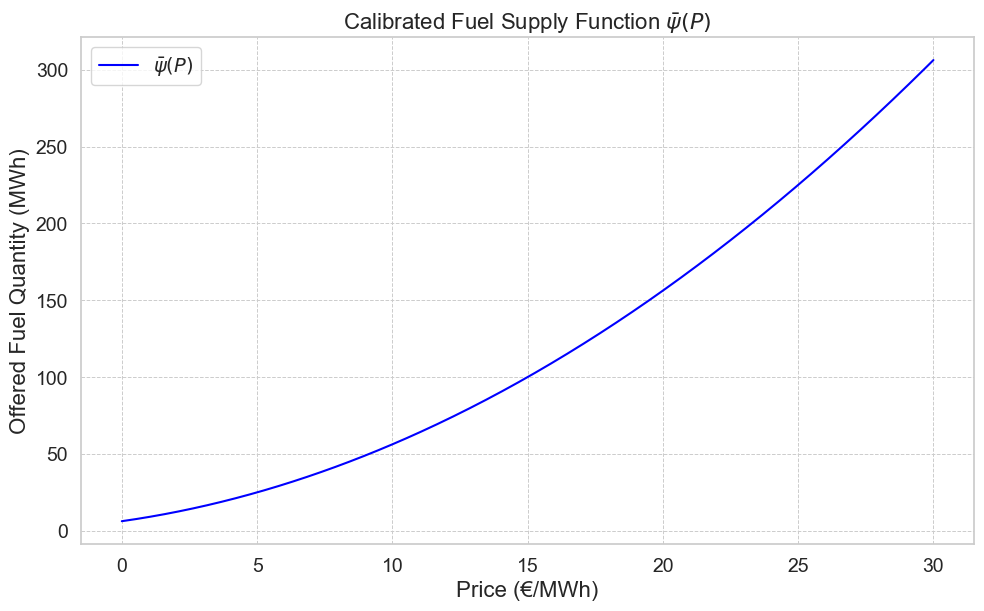

In [11]:
# Generate x values for plotting
x_values = np.linspace(0, 30, 400)

# Calculate y values using the psibar function
y_values1 = np.array([sim.psibar(x) for x in x_values])

# Set up the plot with Seaborn
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values1, color='blue')

# Add titles and labels with units
plt.xlabel('Price (€/MWh)', fontsize=16)
plt.ylabel('Offered Fuel Quantity (MWh)', fontsize=16)

# Add grid, legend, and improve font sizes
plt.grid(True, linestyle='--', linewidth=0.7)
plt.legend(['$\\bar{\\psi}(P)$'], fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Show the plot
plt.tight_layout()
plt.savefig(scenario_name + "/" + 'fuel_supply.pdf', format='pdf')
plt.title('Calibrated Fuel Supply Function $\\bar{\\psi}(P)$', fontsize=16)

plt.show()

In [12]:
# print("############### Planner Version ###############")
# 
# mfg_prices = np.concatenate([out['peak price'], out['offpeak price'], out['Fuel 0'], out['Fuel 1']])
# initial_prices = np.random.rand(2 * sim.Nt + sim.Nfuels * sim.Nt)*10
# 
# planner_objective, sim.Prp, sim.Prop, sim.fPrice = sim.optimizePrices(mfg_prices)
# 
# end_simu = time.time()
# 
# print("Time: ", end_simu-start_simu, "s")
# 
# out = sim.write(scenario_name)

In [13]:
# plt.figure(figsize=(14,5))
# plt.subplot(121)
# plt.plot(2025+out['time'], out['peak price'], label='peak price')
# plt.plot(2025+out['time'], out['offpeak price'], label='offpeak price')
# plt.legend(loc='upper left', fontsize=14)
# plt.title('Electricity price (Planner)')
# 
# plt.subplot(122)
# # Plotting the capacity for each agent type; modify this if you change agent types
# plt.plot(2025+out['time'], out['Coal capacity'], label='Coal capacity')
# plt.plot(2025+out['time'], out['Gas capacity'],label='Gas capacity')
# plt.plot(2025+out['time'], out['Wind capacity'], label='Wind capacity')
# plt.legend(loc='upper left', fontsize=14)
# plt.title('Installed capacity (Planner)')
# plt.savefig(scenario_name+"/"+'price_capacity.pdf', format='pdf')

In [14]:
# plt.figure(figsize=(14, 5))
# plt.subplot(121)
# plt.plot(2025+out['time'], sim.pdemand, label='peak demand')
# plt.plot(2025+out['time'], sim.opdemand, label='offpeak demand')
# plt.legend(loc='upper left', fontsize=14)
# plt.title('Electricity demand (Planner)')
# plt.subplot(122)
# 
# # Plotting the fuel prices; modify this if you change fuel types
# plt.plot(2025+out['time'], out['Fuel 0'], label='Coal price')
# plt.plot(2025+out['time'], out['Fuel 1'], label='Gas price')
# plt.legend(loc='upper left', fontsize=14)
# plt.title('Fuel price (Planner)')
# #plt.plot(2025+out['time'],np.interp(out['time'],cp["carbon tax"][0],cp["carbon tax"][1]))
# plt.savefig(scenario_name+"/"+'demand_fuelprice.pdf',format='pdf')
# 
# 
# plt.figure(fig)
# 
# # Plotting the supply for each agent; modify this if you change agent types
# plt.bar(2025+out['time'],out['Coal peak supply'],width=0.25,label='Coal supply')
# plt.bar(2025+out['time'],out['Gas peak supply'],width=0.25,
#         bottom=out['Coal peak supply'],label='Gas supply')
# plt.bar(2025+out['time'],out['Wind peak supply'],width=0.25,
#         bottom=out['Gas peak supply']+out['Coal peak supply'],label='Wind supply')
# #plt.ylim([0,80])
# plt.title('Conventional/ Wind peak supply, GW (Planner)')
# plt.legend(loc='upper left', fontsize=14)
# plt.subplot(122)
# plt.bar(2025+out['time'],out['Coal offpeak supply'],width=0.5,label='Coal supply')
# plt.bar(2025+out['time'],out['Gas offpeak supply'],width=0.25,
#         bottom=out['Coal offpeak supply'],label='Gas supply')
# plt.bar(2025+out['time'],out['Wind offpeak supply'],width=0.25,
#         bottom=out['Gas offpeak supply']+out['Coal offpeak supply'],label='Wind supply')
# 
# plt.title('Conventional/ Wind off-peak supply, GW (Planner)')
# 
# #plt.ylim([0,80])
# 
# plt.legend(loc='upper left', fontsize=14)
# plt.savefig(scenario_name+"/"+'supply.pdf',format='pdf')
# plt.show()
# 
# 
